## 目录
1. 因子比较与筛选
2. 常用的因子预处理方法-调整正负、去极值、行业市值中性化、标准化
3. 多因子组合方法

In [4]:
from jaqs_fxdayu.data import DataView 
import warnings

warnings.filterwarnings("ignore")
dataview_folder = '../Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

dv.add_formula("momentum", "Return(close_adj, 20)", is_quarterly=False, add_data=True)

Dataview loaded successfully.


symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,-0.100735,-0.085812,-0.057592,-0.006342,-0.100442,-0.051708,-0.068143,0.012426,-0.074534,-0.089580,...,-0.065375,0.104574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.084892
20140103,-0.111690,-0.102975,-0.052910,-0.040881,-0.116740,-0.078923,-0.082474,0.048699,-0.091097,-0.111111,...,-0.075426,0.105497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.091437
20140106,-0.121896,-0.137255,-0.095643,-0.059129,-0.165380,-0.111576,-0.106164,0.011311,-0.098121,-0.134470,...,-0.085575,0.132137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.123726
20140107,-0.118271,-0.138051,-0.109342,-0.060228,-0.174342,-0.122535,-0.104991,0.039841,-0.095745,-0.139847,...,-0.088020,0.076545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.118594
20140108,-0.115124,-0.144175,-0.159346,-0.063224,-0.179235,-0.160665,-0.093103,0.066347,-0.081023,-0.156604,...,-0.085575,0.118630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.127941
20140109,-0.079439,-0.126464,-0.149474,-0.050273,-0.171525,-0.145109,-0.087873,0.109015,-0.075107,-0.143411,...,-0.081481,0.118595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.157895
20140110,-0.070755,-0.134818,-0.147799,-0.048087,-0.186020,-0.158701,-0.097002,0.088464,-0.066667,-0.141199,...,-0.077114,0.032493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.150665
20140113,-0.075697,-0.152225,-0.117032,-0.038419,-0.189342,-0.207055,-0.083333,0.074930,-0.069414,-0.193490,...,-0.062344,0.109781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.113264
20140114,-0.080784,-0.142349,-0.100105,-0.044662,-0.089120,-0.187791,-0.063063,0.123944,-0.039560,-0.177007,...,-0.062814,0.100159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.094225


In [5]:
import numpy as np

def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) #定义信号过滤条件-非指数成分
    return mask_index_member

def limit_up_down():
    # 定义可买卖条件——未停牌、未涨跌停
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == 0
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False, add_data=True)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False, add_data=True)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

接下来，我们对pb、pe、ps、float_mv、momentum五个因子进行比较、筛选

In [6]:
from jaqs_fxdayu.research.signaldigger import multi_factor

ic = dict()
factors_dict = {signal:dv.get_ts(signal) for signal in ["pb","pe","ps","float_mv","momentum"]}
for period in [5, 15, 30]:
    ic[period]=multi_factor.get_factors_ic_df(factors_dict,
                                              price=dv.get_ts("close_adj"),
                                              high=dv.get_ts("high_adj"), # 可为空
                                              low=dv.get_ts("low_adj"),# 可为空
                                              n_quantiles=5,# quantile分类数
                                              mask=mask,# 过滤条件
                                              can_enter=can_enter,# 是否能进场
                                              can_exit=can_exit,# 是否能出场
                                              period=period,# 持有期
                                              benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                              commission = 0.0008,
                                              )

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective da

In [7]:
import pandas as pd
ic_mean_table = pd.DataFrame(data=np.nan,columns=[5,15,30],index=["pb","pe","ps","float_mv","momentum"])
ic_std_table = pd.DataFrame(data=np.nan,columns=[5,15,30],index=["pb","pe","ps","float_mv","momentum"])
ir_table = pd.DataFrame(data=np.nan,columns=[5,15,30],index=["pb","pe","ps","float_mv","momentum"])
for signal in ["pb","pe","ps","float_mv","momentum"]:
    for period in [5, 15, 30]:
        ic_mean_table.loc[signal,period]=ic[period][signal].mean()
        ic_std_table.loc[signal,period]=ic[period][signal].std()
        ir_table.loc[signal,period]=ic[period][signal].mean()/ic[period][signal].std()

print(ic_mean_table)
print(ic_std_table)
print(ir_table)

                5         15        30
pb       -0.039948 -0.069184 -0.106428
pe       -0.038036 -0.065607 -0.098353
ps       -0.032231 -0.057777 -0.087181
float_mv  0.006833  0.021287  0.044382
momentum -0.041551 -0.053251 -0.047145
                5         15        30
pb        0.231587  0.259397  0.245520
pe        0.210134  0.220244  0.210795
ps        0.176345  0.193792  0.188749
float_mv  0.222908  0.229546  0.229144
momentum  0.207719  0.215057  0.209887
                5         15        30
pb       -0.172496 -0.266712 -0.433481
pe       -0.181008 -0.297881 -0.466578
ps       -0.182774 -0.298140 -0.461889
float_mv  0.030655  0.092735  0.193688
momentum -0.200034 -0.247614 -0.224622


可视化比较

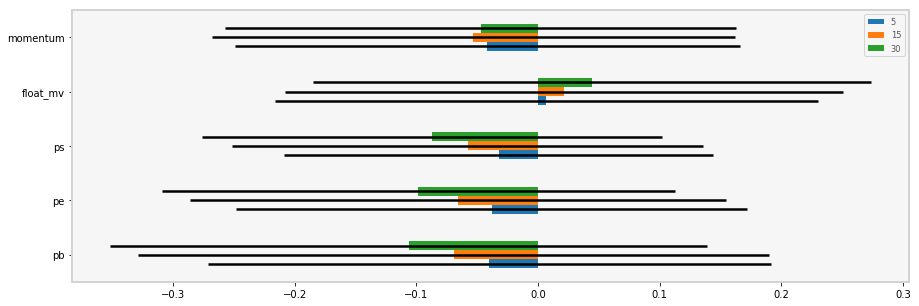

In [8]:
%matplotlib inline
ic_mean_table.plot(kind="barh",xerr=ic_std_table,figsize=(15,5))

* IC_IR:方差标准化后的ic均值
* 一般而言，认为|IC_IR|>0.6,因子的稳定性合格

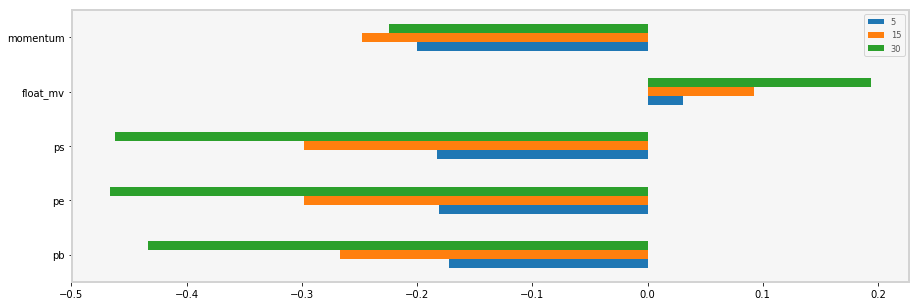

In [9]:
%matplotlib inline
ir_table.plot(kind="barh",figsize=(15,5))

### 因子预处理
保留momentum、ps、pe、pb 进一步处理并尝试构建组合因子

* 根据之前的分析，这几个因子在几个持有期下与股票收益的关系（ic）都是负的，先统一调整成正相关关系
* 去极值
* 标准化 -- z-score、rank
* 行业市值中性化


In [29]:
from jaqs_fxdayu.research.signaldigger import process

factor_dict = dict()
index_member = dv.get_ts("index_member")
for name in ["pb","pe","ps","momentum"]:
    signal = -1*dv.get_ts(name) # 调整符号
    process.winsorize(factor_df=signal,alpha=0.05,index_member=index_member)#去极值
    signal = process.standardize(signal,index_member) #z-score标准化 保留排序信息和分布信息
    signal = process.rank_standardize(signal,index_member) #因子在截面排序并归一化到0-1(只保留排序信息)
    # 行业市值中性化
    signal = process.neutralize(signal,
                                group=dv.get_ts("sw1"),# 行业分类标准
                                float_mv = dv.get_ts("float_mv"), #流通市值 可为None 则不进行市值中性化
                                index_member=index_member,# 是否只处理时只考虑指数成份股
                                )
    factor_dict[name] = signal

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,-1.0563,-1.2891,NaN,-3.5794,-2.3725,-1.3202,NaN,-2.0483,-2.4159,NaN,...,-0.821600,-10.048700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.7133
20140103,-1.0304,-1.2649,NaN,-3.4842,-2.3346,-1.2977,NaN,-2.0801,-2.3726,NaN,...,-0.808800,-9.888600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.6706
20140106,-1.0079,-1.2068,NaN,-3.4537,-2.2036,-1.2283,NaN,-2.0113,-2.3348,NaN,...,-0.796000,-9.851500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5682
20140107,-1.0044,-1.1987,NaN,-3.4461,-2.1920,-1.2013,NaN,-2.0721,-2.2970,NaN,...,-0.793900,-10.102400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5682
20140108,-1.0157,-1.1971,NaN,-3.3852,-2.1862,-1.1685,NaN,-2.0629,-2.3294,NaN,...,-0.796000,-10.371300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5298
20140109,-1.0263,-1.2036,NaN,-3.3090,-2.1512,-1.1853,NaN,-2.0999,-2.3294,NaN,...,-0.791800,-10.398200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.4573
20140110,-1.0263,-1.1907,NaN,-3.3166,-2.1017,-1.1653,NaN,-2.0351,-2.3456,NaN,...,-0.789600,-9.968000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.4530
20140113,-1.0072,-1.1681,NaN,-3.3357,-2.0814,-1.1126,NaN,-2.0311,-2.3186,NaN,...,-0.800300,-10.562100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5384
20140114,-1.0177,-1.1665,NaN,-3.3395,-2.2910,-1.1203,NaN,-2.1118,-2.3618,NaN,...,-0.793900,-10.593882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5426


symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,-7.4801,-7.0113,NaN,-73.4823,-61.5622,-10.6301,NaN,-21.2543,-26.0475,NaN,...,-5.8198,-103.1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.7382
20140103,-7.2966,-6.8796,NaN,-71.5280,-60.5802,-10.4489,NaN,-21.5839,-25.5814,NaN,...,-5.7293,-101.5099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.2549
20140106,-7.1376,-6.5637,NaN,-70.9026,-57.1811,-9.8900,NaN,-20.8699,-25.1735,NaN,...,-5.6388,-101.1287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29.0949
20140107,-7.1131,-6.5199,NaN,-70.7462,-56.8790,-9.6726,NaN,-21.5015,-24.7656,NaN,...,-5.6238,-103.7049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29.0949
20140108,-7.1927,-6.5111,NaN,-69.4955,-56.7279,-9.4087,NaN,-21.4054,-25.1152,NaN,...,-5.6388,-106.4651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.6600
20140109,-8.3965,-6.5462,NaN,-67.9320,-55.8214,-9.5432,NaN,-21.7898,-25.1152,NaN,...,-5.6087,-106.7411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-27.8383
20140110,-8.3965,-6.4760,NaN,-68.0884,-54.5373,-9.3828,NaN,-21.1170,-25.2900,NaN,...,-5.5936,-102.3248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-27.7900
20140113,-8.2402,-6.3531,NaN,-68.4792,-54.0086,-8.9584,NaN,-21.0758,-24.9986,NaN,...,-5.6690,-108.4235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.7566
20140114,-8.3254,-6.3444,NaN,-68.5574,-59.4472,-9.0205,NaN,-21.9134,-25.4648,NaN,...,-5.6238,-109.1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.8050


symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,-2.5222,-0.8534,NaN,-2.9297,-2.4182,-1.3944,NaN,-0.7585,-4.5825,NaN,...,-2.0193,-19.692170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.653100
20140103,-2.4603,-0.8374,NaN,-2.8518,-2.3797,-1.3706,NaN,-0.7703,-4.5005,NaN,...,-1.9879,-19.711308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.564200
20140106,-2.4067,-0.7989,NaN,-2.8269,-2.2461,-1.2973,NaN,-0.7448,-4.4288,NaN,...,-1.9566,-19.313012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.350900
20140107,-2.3985,-0.7936,NaN,-2.8207,-2.2343,-1.2688,NaN,-0.7673,-4.3570,NaN,...,-1.9513,-19.228350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.350900
20140108,-2.4253,-0.7925,NaN,-2.7708,-2.2283,-1.2342,NaN,-0.7639,-4.4185,NaN,...,-1.9566,-19.306495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.270900
20140109,-2.8312,-0.7968,NaN,-2.7085,-2.1927,-1.2518,NaN,-0.7776,-4.4185,NaN,...,-1.9461,-18.929770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.119800
20140110,-2.8312,-0.7882,NaN,-2.7147,-2.1423,-1.2308,NaN,-0.7536,-4.4493,NaN,...,-1.9409,-18.295960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.110900
20140113,-2.7785,-0.7733,NaN,-2.7303,-2.1215,-1.1751,NaN,-0.7522,-4.3980,NaN,...,-1.9670,-18.508745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.288700
20140114,-2.8072,-0.7722,NaN,-2.7334,-2.3352,-1.1833,NaN,-0.7820,-4.4800,NaN,...,-1.9513,-18.981685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.297600


symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,0.100735,0.085812,NaN,0.006342,0.100442,0.051708,NaN,-0.012426,0.074534,NaN,...,0.065375,-0.095649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084892
20140103,0.111690,0.102975,NaN,0.040881,0.116740,0.078923,NaN,-0.048699,0.091097,NaN,...,0.075426,-0.105497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.091437
20140106,0.121896,0.137255,NaN,0.059129,0.165380,0.111576,NaN,-0.011311,0.098121,NaN,...,0.085575,-0.096846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.123726
20140107,0.118271,0.138051,NaN,0.060228,0.174342,0.122535,NaN,-0.039841,0.095745,NaN,...,0.088020,-0.076545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118594
20140108,0.115124,0.144175,NaN,0.063224,0.179235,0.160665,NaN,-0.066347,0.081023,NaN,...,0.085575,-0.118630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127941
20140109,0.079439,0.126464,NaN,0.050273,0.171525,0.145109,NaN,-0.109015,0.075107,NaN,...,0.081481,-0.118595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157895
20140110,0.070755,0.134818,NaN,0.048087,0.186020,0.158701,NaN,-0.088464,0.066667,NaN,...,0.077114,-0.032493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150665
20140113,0.075697,0.152225,NaN,0.038419,0.189342,0.207055,NaN,-0.074930,0.069414,NaN,...,0.062344,-0.103337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113264
20140114,0.080784,0.142349,NaN,0.044662,0.089120,0.187791,NaN,-0.123944,0.039560,NaN,...,0.062814,-0.100159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094225


### 多因子组合
对筛选后的因子进行组合，一般有以下常规处理：
* 因子间存在较强同质性时，先使用施密特正交化方法对因子做正交化处理，用得到的正交化残差作为因子（也可以不使用，正交化会破坏因子的经济学逻辑，并剔除一些信息）
* 因子组合加权，常规的方法有：等权重、以某个时间窗口的滚动平均ic为权重、以某个时间窗口的滚动ic_ir为权重、最大化上个持有期的ic_ir为目标处理权重、最大化上个持有期的ic为目标处理权重
* 注:因为计算IC需要用到下一期股票收益,因此在动态加权方法里，实际上使用的是前一期及更早的IC值(向前推移了holding_period)计算当期的权重

In [30]:
# 因子间存在较强同质性时，使用施密特正交化方法对因子做正交化处理，用得到的正交化残差作为因子
new_factors = multi_factor.orthogonalize(factors_dict=factor_dict,
                           standardize_type="rank",#输入因子标准化方法，有"rank"（排序标准化）,"z_score"(z-score标准化)两种（"rank"/"z_score"）
                           winsorization=False,#是否对输入因子去极值
                           index_member=index_member) #　是否只处理指数成分股

In [31]:
new_factors

{'pb': symbol      000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  000024.SZ  \
 trade_date                                                                     
 20140102     0.404682   0.739130        NaN   0.140468   0.086957   0.578595   
 20140103     0.448161   0.742475        NaN   0.153846   0.083612   0.591973   
 20140106     0.464883   0.759197        NaN   0.150502   0.090301   0.608696   
 20140107     0.441472   0.749164        NaN   0.177258   0.093645   0.635452   
 20140108     0.411371   0.745819        NaN   0.170569   0.096990   0.678930   
 20140109     0.297659   0.735786        NaN   0.133779   0.100334   0.648829   
 20140110     0.294314   0.755853        NaN   0.123746   0.103679   0.675585   
 20140113     0.317726   0.769231        NaN   0.110368   0.103679   0.732441   
 20140114     0.341137   0.782609        NaN   0.130435   0.063545   0.732441   
 20140115     0.337793   0.772575        NaN   0.120401   0.070234   0.732441   
 20140116     0.334448

用正交化前的因子，分别进行等权、以某个时间窗口的滚动平均ic为权重、以某个时间窗口的滚动ic_ir为权重、最大化上个持有期的ic_ir为目标处理权重、最大化上个持有期的ic为目标处理权重的加权组合方式，然后测试组合因子表现

In [32]:
# rollback_period代表滚动窗口所用到的天数,即用前多少期的数据来计算现阶段的因子权重。 通常建议设置时间在半年以上,可以获得相对稳定的预期结果

#  多因子组合-动态加权参数配置
props = {
    'price':dv.get_ts("close_adj"),
    'high':dv.get_ts("high_adj"), # 可为空
    'low':dv.get_ts("low_adj"),# 可为空
    'ret_type': 'return',#可选参数还有upside_ret/downside_ret 则组合因子将以优化潜在上行、下行空间为目标
    'benchmark_price': dv.data_benchmark,  # 为空计算的是绝对收益　不为空计算相对收益
    'period': 30, # 30天的持有期
    'mask': mask,
    'can_enter': can_enter,
    'can_exit': can_exit,
    'forward': True,
    'commission': 0.0008,
    "covariance_type": "shrink",  # 协方差矩阵估算方法 还可以为"simple"
    "rollback_period": 120}  # 滚动窗口天数

In [33]:
comb_factors = dict()
for method in ["equal_weight","ic_weight","ir_weight","max_IR","max_IC"]:
    comb_factors[method] = multi_factor.combine_factors(factor_dict,
                                                        standardize_type="rank",
                                                        winsorization=False,
                                                        weighted_method=method,
                                                        props=props)
    print(method)
    print(comb_factors[method].dropna(how="all").head())

equal_weight
symbol      000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  000024.SZ  \
trade_date                                                                     
20140102     0.448161   0.762542        NaN   0.110368   0.063545   0.488294   
20140103     0.481605   0.755853        NaN   0.160535   0.070234   0.565217   
20140106     0.494983   0.789298        NaN   0.143813   0.080268   0.578595   
20140107     0.458194   0.775920        NaN   0.193980   0.093645   0.628763   
20140108     0.448161   0.745819        NaN   0.177258   0.093645   0.698997   

symbol      000027.SZ  000039.SZ  000046.SZ  000059.SZ    ...      601998.SH  \
trade_date                                                ...                  
20140102          NaN   0.207358   0.066890        NaN    ...       0.461538   
20140103          NaN   0.190635   0.080268        NaN    ...       0.511706   
20140106          NaN   0.220736   0.043478        NaN    ...       0.508361   
20140107          NaN   0.

Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
max_IC
symbol      000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  000024.SZ  \
trade_date                                                                     
20140221     0.688963   0.963211        NaN   0.137124   0.167224   0.993311   
20140224     0.715719   0.949833        NaN   0.130435   0.043478   0.986622   
20140225     0.638796   0.939799        NaN   0.080268   0.083612   0.976589   
20140226     0.739130   0.919732        NaN   0.123746   0.096990   0.969900   
20140227     0.742475   0.913043        NaN   0.086957   0.060201   0.966555   

symbol      000027.SZ  000039.SZ  000046.SZ  000059.SZ    ...      601998.SH  \
trade_date                                                ...   

### 比较组合前和组合后的因子在30日持有期下的表现（统一到2014年9月后进行比较）

In [34]:
period = 30
ic_30  =   multi_factor.get_factors_ic_df(comb_factors,
                                          price=dv.get_ts("close_adj"),
                                          high=dv.get_ts("high_adj"), # 可为空
                                          low=dv.get_ts("low_adj"),# 可为空
                                          n_quantiles=5,# quantile分类数
                                          mask=mask,# 过滤条件
                                          can_enter=can_enter,# 是否能进场
                                          can_exit=can_exit,# 是否能出场
                                          period=period,# 持有期
                                          benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                          commission = 0.0008,
                                          )
ic_30 = pd.concat([ic_30,-1*ic[30].drop("float_mv",axis=1)],axis=1)
ic_30.head()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 48%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 48%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 48%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 56%


,equal_weight,ic_weight,ir_weight,max_IR,max_IC,pb,pe,ps,momentum
trade_date,,,,,,,,,
20140102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140103,0.122604,NaN,NaN,NaN,NaN,-0.053375,-0.018784,-0.004749,-0.050374
20140106,0.150247,NaN,NaN,NaN,NaN,-0.085169,-0.053065,-0.018863,-0.065761
20140107,0.199034,NaN,NaN,NaN,NaN,0.026080,0.023327,0.056947,0.013767
20140108,0.246149,NaN,NaN,NaN,NaN,0.084499,0.081695,0.158560,0.132101


In [35]:
ic_30_mean = dict()
ic_30_std = dict()
ir_30 = dict()
for name in ic_30.columns:    
    ic_30_mean[name]=ic_30[name].loc[20140901:].mean()
    ic_30_std[name]=ic_30[name].loc[20140901:].std()
    ir_30[name] = ic_30_mean[name]/ic_30_std[name]

In [36]:
import datetime

trade_date = pd.Series(ic_30.index)
trade_date = trade_date.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
ic_30.index = trade_date

可视化比较

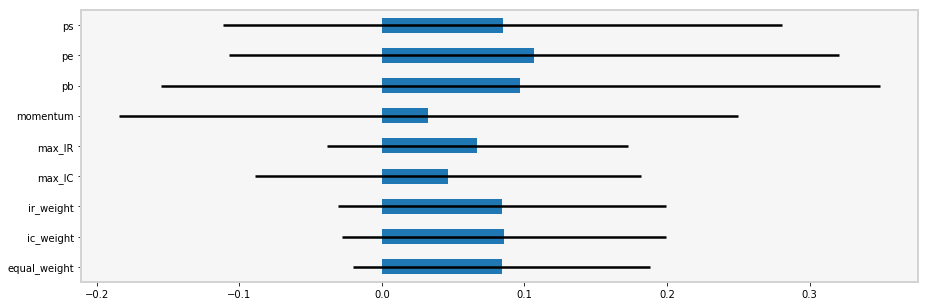

In [37]:
pd.Series(ic_30_mean).plot(kind="barh",xerr=pd.Series(ic_30_std),figsize=(15,5))

In [38]:
print(ic_30_mean["equal_weight"])
print(ic_30_mean["ic_weight"])
print(ic_30_mean["pe"])

0.08398567885208977
0.08582508612252594
0.1067541063545408


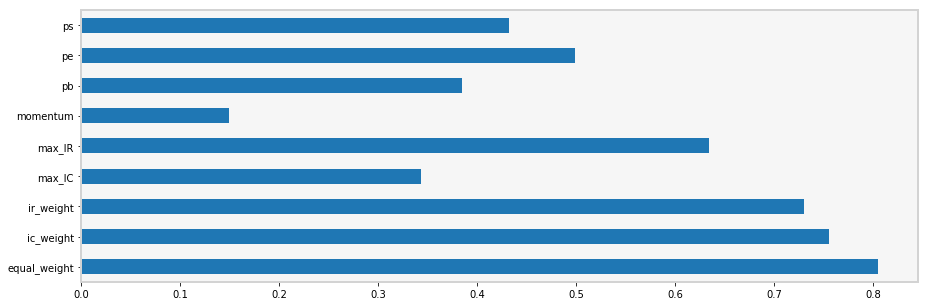

In [39]:
pd.Series(ir_30).plot(kind="barh",figsize=(15,5))

In [40]:
print(ir_30["equal_weight"])
print(ir_30["ic_weight"])
print(ir_30["pe"])

0.8049790840507153
0.7552530333711724
0.4986503963545165


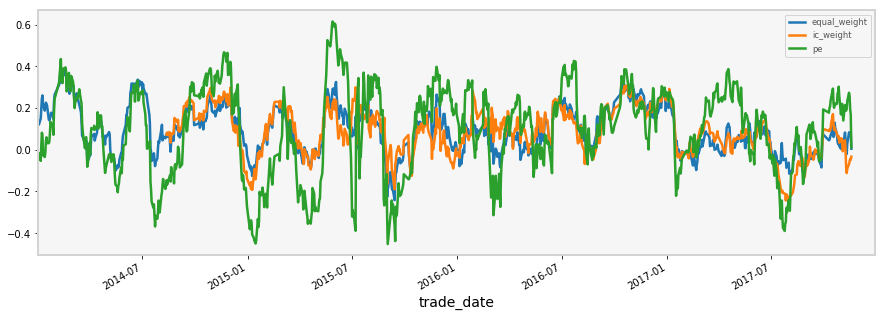

In [41]:
ic_30[["equal_weight","ic_weight","pe"]].plot(kind="line",figsize=(15,5),)

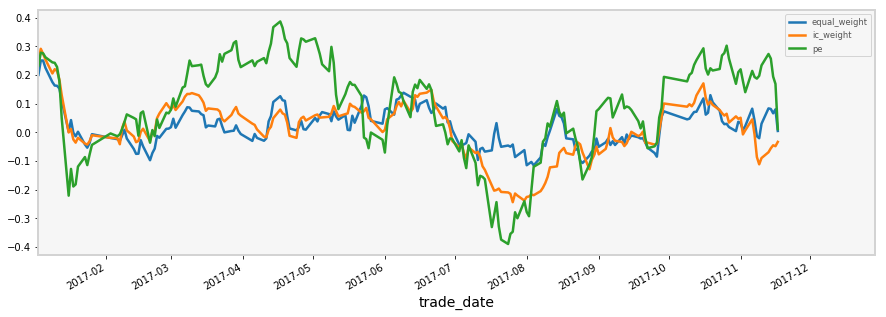

In [42]:
ic_30.loc[datetime.date(2017,1,3):,][["equal_weight","ic_weight","pe"]].plot(kind="line",figsize=(15,5),)

### 查看等权合成因子的详情报告

Nan Data Count (should be zero) : 0;  Percentage of effective data: 56%


Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1         0.000000  0.331104  0.101588  0.059923  53388  20.145655
2         0.187291  0.471572  0.305341  0.059485  53003  20.000377
3         0.377926  0.652174  0.506696  0.058512  52990  19.995472
4         0.545151  0.829431  0.705802  0.058124  53003  20.000377
5         0.678930  1.000000  0.903346  0.056792  52626  19.858119
Figure saved: C:\Users\WJ\Desktop\QTC_2.0-master\6_因子研发工具实操Richard\returns_report.pdf
Information Analysis
                 ic
IC Mean       0.094
IC Std.       0.111
t-stat(IC)   25.872
p-value(IC)   0.000
IC Skew       0.135
IC Kurtosis  -0.534
Ann. IR       0.841
Figure saved: C:\Users\WJ\Desktop\QTC_2.0-master\6_因子研发工具实操Richard\information_report.pdf


{'period_wise_quantile_ret': {1:                 mean       std  count
  trade_date                           
  20140103    0.002849  0.116688     59
  20140106   -0.010748  0.104527     60
  20140107   -0.021804  0.104430     60
  20140108   -0.014582  0.117027     60
  20140109   -0.035906  0.118366     59
  20140110   -0.009718  0.134109     60
  20140113   -0.006235  0.130870     60
  20140114   -0.009053  0.132825     60
  20140115   -0.006062  0.128782     60
  20140116   -0.007161  0.132924     60
  20140117   -0.003517  0.132814     60
  20140120    0.001414  0.127084     60
  20140121   -0.005772  0.117515     60
  20140122   -0.006136  0.112298     59
  20140123   -0.017170  0.110540     59
  20140124   -0.029301  0.098969     59
  20140127   -0.016488  0.102470     60
  20140128   -0.013884  0.097345     60
  20140129   -0.006914  0.111730     59
  20140130   -0.016303  0.113215     59
  20140207   -0.035681  0.106340     59
  20140210   -0.044277  0.112365     58
  2014021

<Figure size 432x288 with 0 Axes>

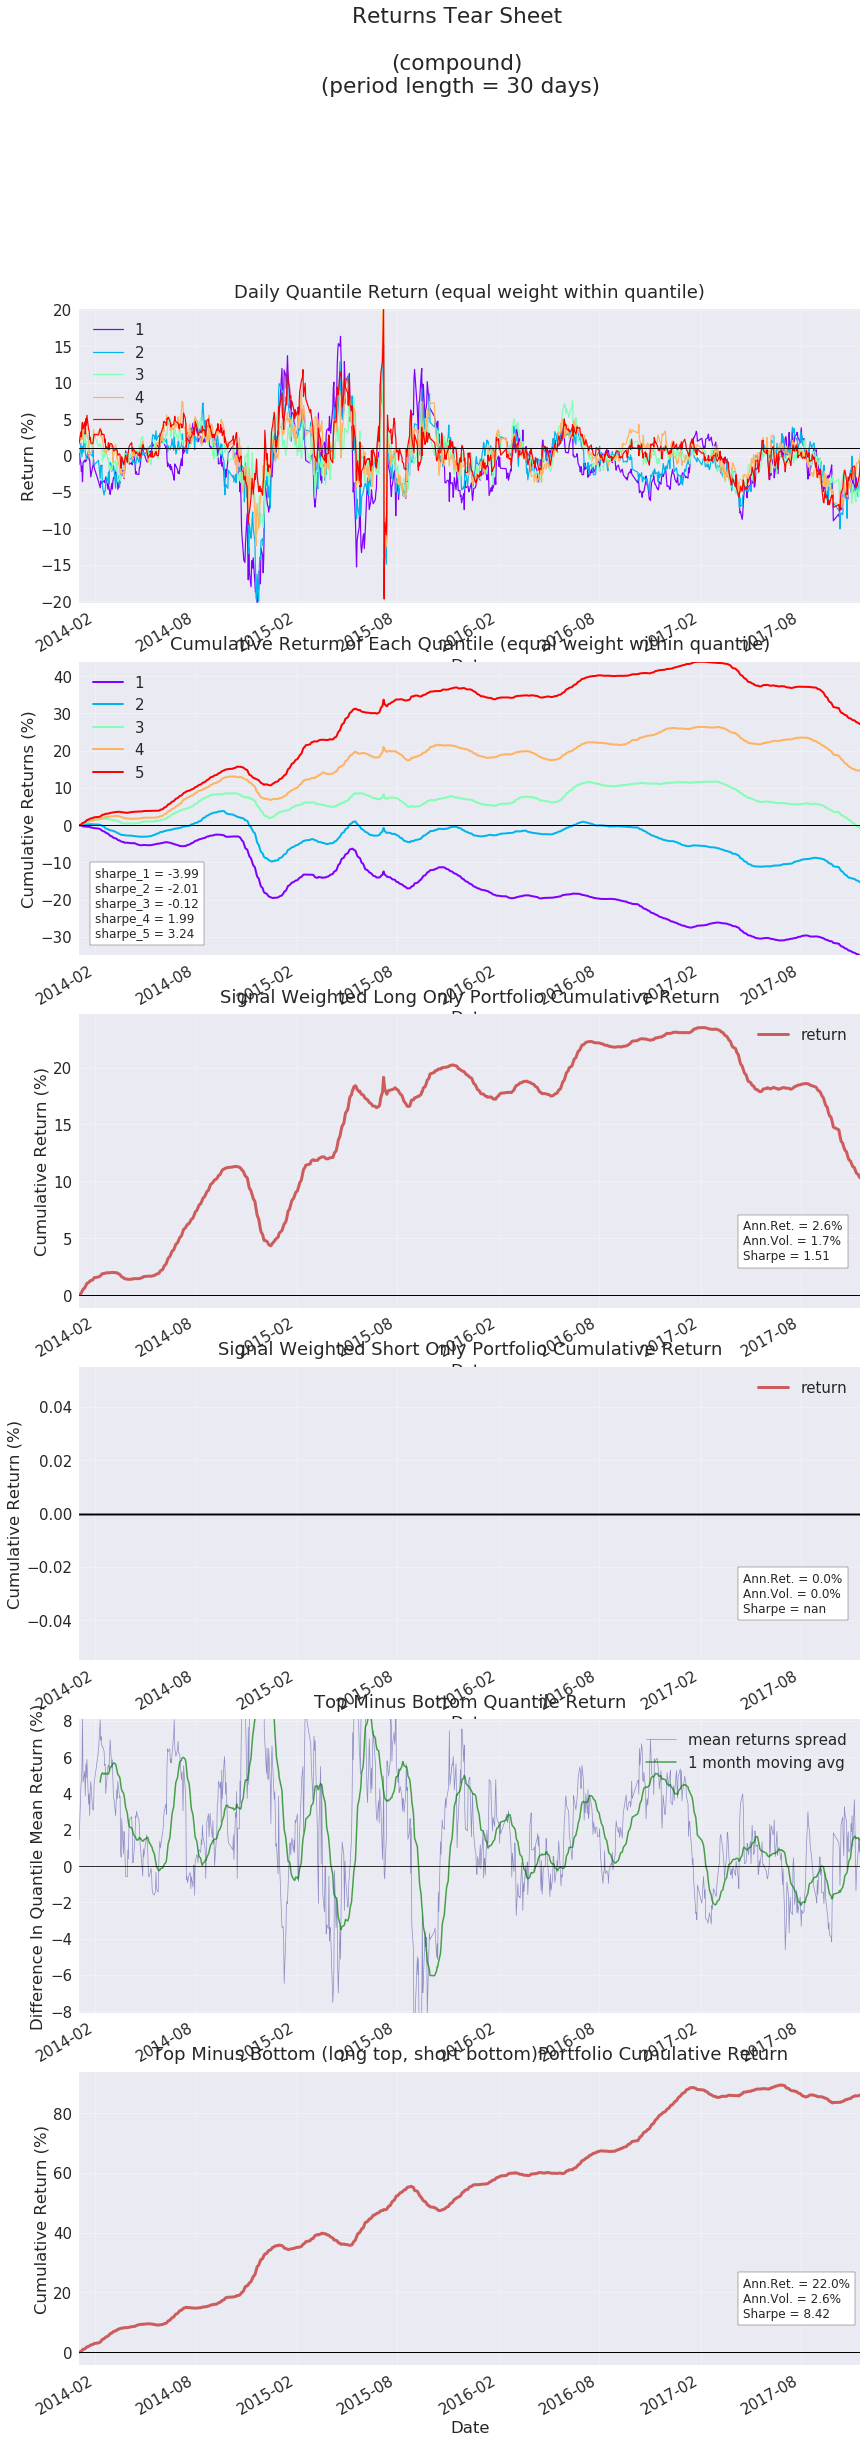

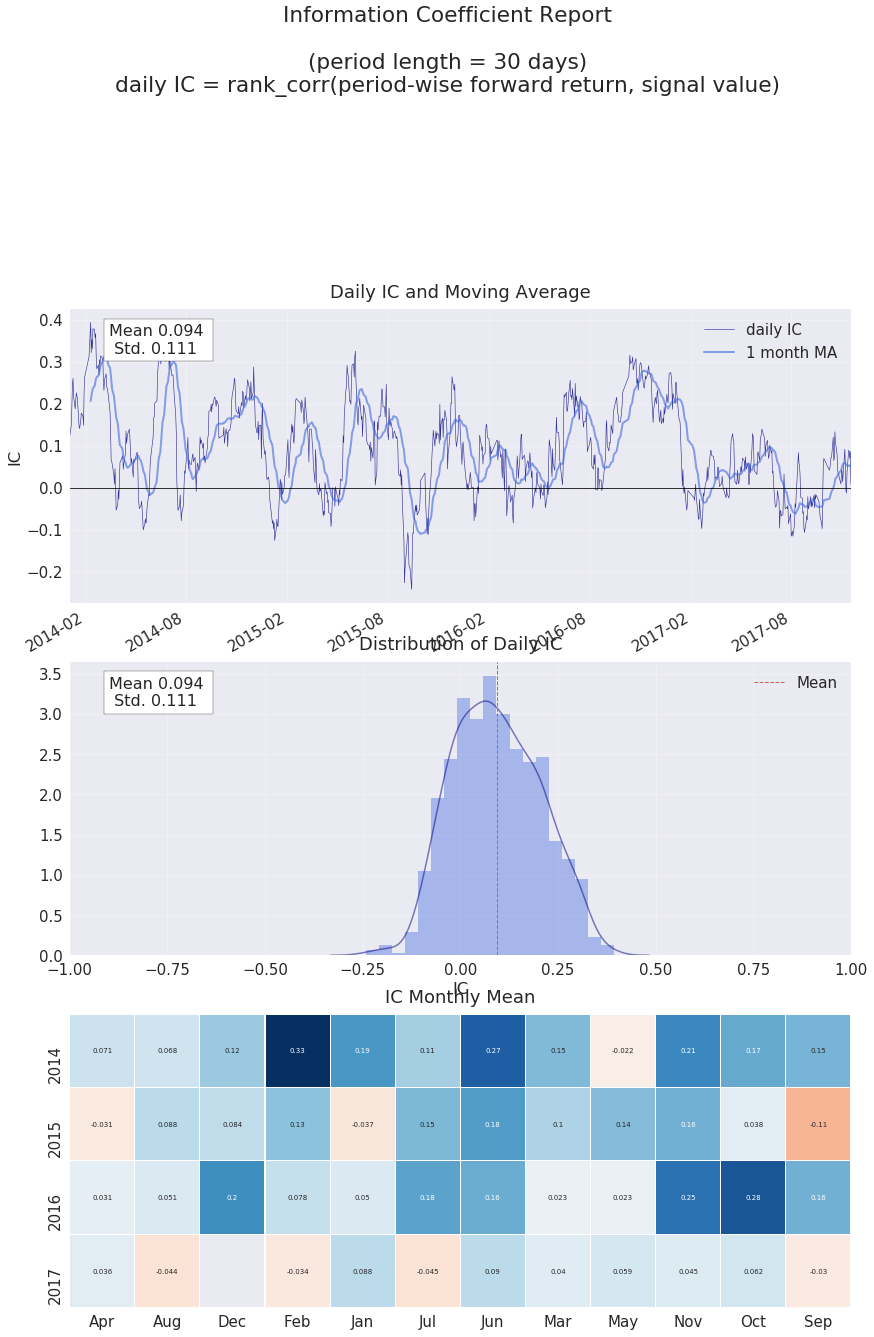

In [43]:
import matplotlib.pyplot as plt
from jaqs_fxdayu.research.signaldigger.analysis import analysis
from jaqs_fxdayu.research import SignalDigger

obj = SignalDigger()
obj.process_signal_before_analysis(signal=comb_factors["equal_weight"],
                                   price=dv.get_ts("close_adj"),
                                   high=dv.get_ts("high_adj"), # 可为空
                                   low=dv.get_ts("low_adj"),# 可为空
                                   n_quantiles=5,# quantile分类数
                                   mask=mask,# 过滤条件
                                   can_enter=can_enter,# 是否能进场
                                   can_exit=can_exit,# 是否能出场
                                   period=30,# 持有期
                                   benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                   commission = 0.0008,
                                   )
obj.create_full_report()
plt.show()

In [44]:
print(analysis(obj.signal_data,is_event=False,period=30))

{'ic':                  return_ic  upside_ret_ic  downside_ret_ic
IC Mean       9.373637e-02      -0.001398     1.785591e-01
IC Std.       1.114347e-01       0.117418     9.445354e-02
t-stat(IC)    2.587218e+01      -0.366219     5.814458e+01
p-value(IC)  5.184852e-112       0.714283    2.079762e-314
IC Skew       1.354838e-01       0.244220    -2.886124e-01
IC Kurtosis  -5.343540e-01      -0.503434    -2.358241e-01
Ann. IR       8.411772e-01      -0.011907     1.890443e+00, 'ret':              long_ret  long_short_ret  top_quantile_ret  bottom_quantile_ret  \
t-stat       3.580260       18.523348         18.407488           -20.823113   
p-value      0.000360        0.000000          0.000000             0.000000   
skewness     0.150525        0.675039          1.383697             1.363807   
kurtosis     3.372576        1.720227          7.537268             7.802154   
Ann. Ret     0.027943        0.070716          0.067547            -0.097653   
Ann. Vol     0.084476        0.04

进一步测试下等权合成因子的绝对收益效果

Nan Data Count (should be zero) : 0;  Percentage of effective data: 56%


Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1         0.000000  0.331104  0.101588  0.059923  53388  20.145655
2         0.187291  0.471572  0.305341  0.059485  53003  20.000377
3         0.377926  0.652174  0.506696  0.058512  52990  19.995472
4         0.545151  0.829431  0.705802  0.058124  53003  20.000377
5         0.678930  1.000000  0.903346  0.056792  52626  19.858119
Figure saved: C:\Users\WJ\Desktop\QTC_2.0-master\6_因子研发工具实操Richard\returns_report.pdf
Information Analysis
                 ic
IC Mean       0.094
IC Std.       0.111
t-stat(IC)   25.872
p-value(IC)   0.000
IC Skew       0.135
IC Kurtosis  -0.534
Ann. IR       0.841
Figure saved: C:\Users\WJ\Desktop\QTC_2.0-master\6_因子研发工具实操Richard\information_report.pdf


{'period_wise_quantile_ret': {1:                 mean       std  count
  trade_date                           
  20140103   -0.008712  0.116688     59
  20140106   -0.021526  0.104527     60
  20140107   -0.057591  0.104430     60
  20140108   -0.049599  0.117027     60
  20140109   -0.066557  0.118366     59
  20140110   -0.021456  0.134109     60
  20140113   -0.007743  0.130870     60
  20140114   -0.021966  0.132825     60
  20140115   -0.026418  0.128782     60
  20140116   -0.024436  0.132924     60
  20140117   -0.008167  0.132814     60
  20140120   -0.030075  0.127084     60
  20140121   -0.041773  0.117515     60
  20140122   -0.063923  0.112298     59
  20140123   -0.058192  0.110540     59
  20140124   -0.084002  0.098969     59
  20140127   -0.049377  0.102470     60
  20140128   -0.050699  0.097345     60
  20140129   -0.054904  0.111730     59
  20140130   -0.068737  0.113215     59
  20140207   -0.059945  0.106340     59
  20140210   -0.084400  0.112365     58
  2014021

<Figure size 432x288 with 0 Axes>

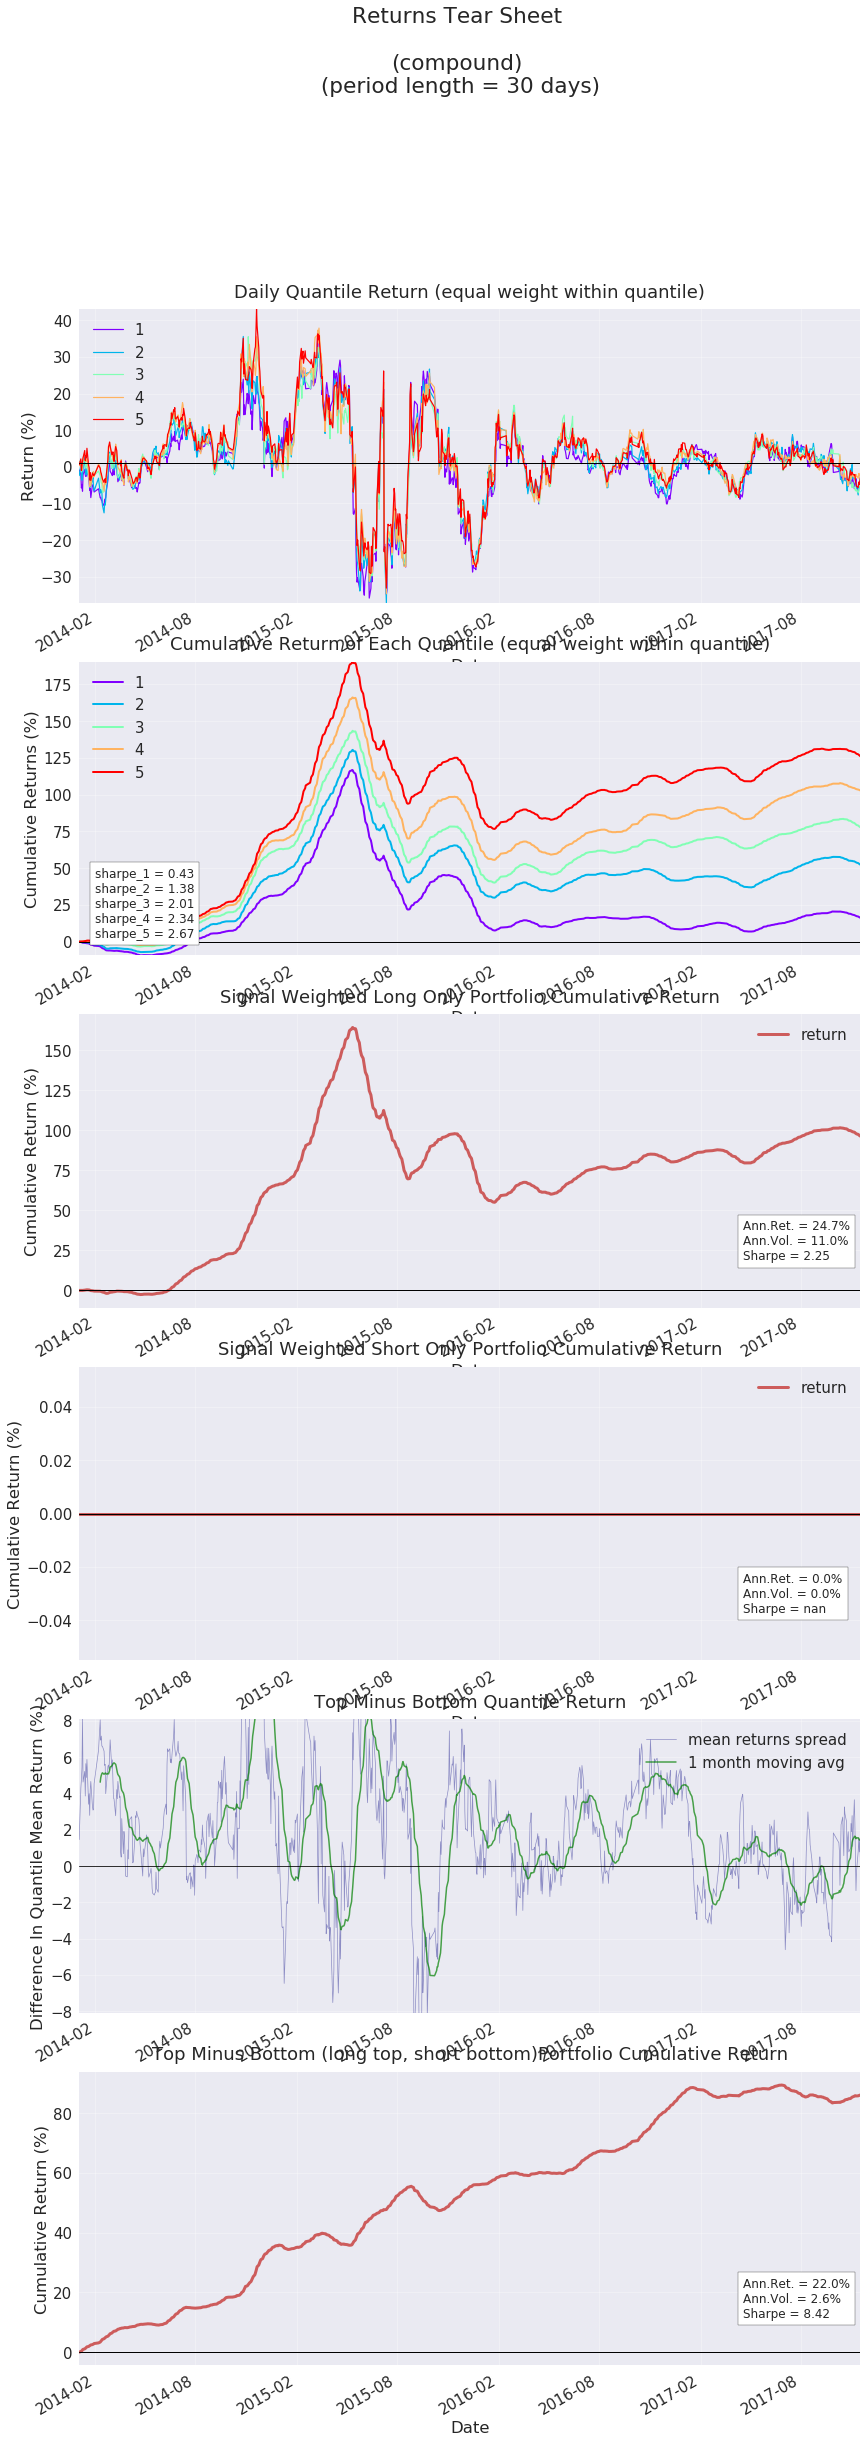

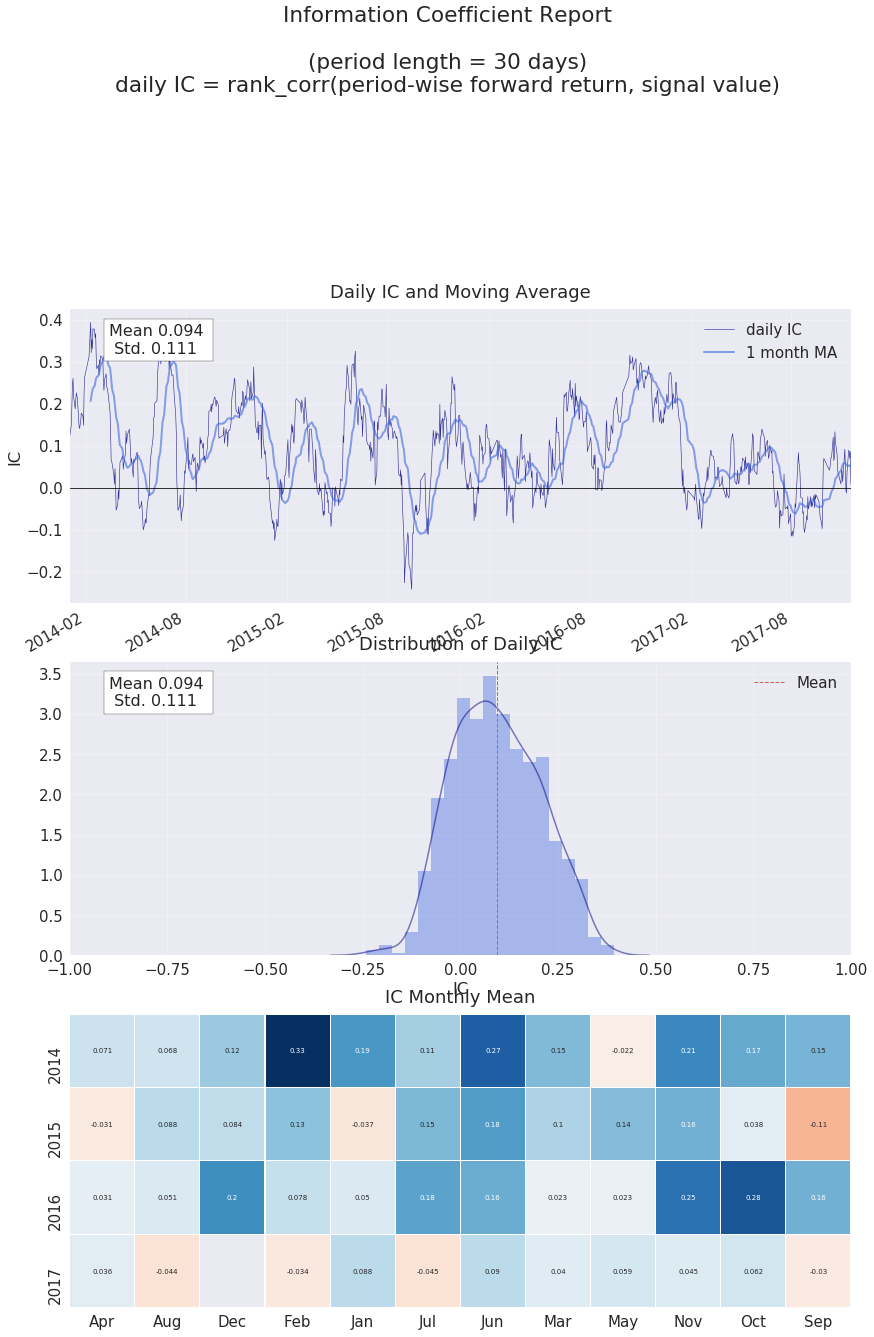

In [45]:
obj.process_signal_before_analysis(signal=comb_factors["equal_weight"],
                                   price=dv.get_ts("close_adj"),
                                   high=dv.get_ts("high_adj"), # 可为空
                                   low=dv.get_ts("low_adj"),# 可为空
                                   n_quantiles=5,# quantile分类数
                                   mask=mask,# 过滤条件
                                   can_enter=can_enter,# 是否能进场
                                   can_exit=can_exit,# 是否能出场
                                   period=30,# 持有期
                                   #benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                   commission = 0.0008,
                                   )
obj.create_full_report()
plt.show()

## 将Quantile5的选股结果保存成excel

In [46]:
excel_data = obj.signal_data[obj.signal_data['quantile']==5]["quantile"].unstack().replace(np.nan, 0).replace(5, 1)
print (excel_data.head())
excel_data.to_excel('./equal_weight_quantile_5.xlsx')

symbol      000001.SZ  000002.SZ  000009.SZ  000024.SZ  000027.SZ  000039.SZ  \
trade_date                                                                     
20140103          0.0        0.0        0.0        0.0        0.0        0.0   
20140106          0.0        0.0        0.0        0.0        0.0        0.0   
20140107          0.0        0.0        0.0        0.0        0.0        0.0   
20140108          0.0        0.0        0.0        0.0        0.0        0.0   
20140109          0.0        0.0        0.0        0.0        0.0        0.0   

symbol      000060.SZ  000063.SZ  000069.SZ  000100.SZ    ...      601919.SH  \
trade_date                                                ...                  
20140103          0.0        0.0        0.0        0.0    ...            0.0   
20140106          0.0        0.0        0.0        0.0    ...            0.0   
20140107          0.0        0.0        0.0        0.0    ...            0.0   
20140108          0.0        0.0       